<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/DR_VGG16_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/DR fundus images/split')

['train', 'val', 'test']

In [2]:
os.listdir('/content/drive/MyDrive/DR fundus images/split/train')

['DR2', 'DR3', 'DR1']

In [3]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/train',
                                          target_size=(100,100),
                                          class_mode='categorical')

valimages = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/val',
                                        target_size=(100,100),
                                        class_mode='categorical')

testimages = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/test',
                                         target_size=(100,100),
                                         class_mode='categorical')


Found 78 images belonging to 3 classes.
Found 14 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


In [4]:
import keras
VGG = keras.applications.VGG16(include_top=False,
                               weights="imagenet",
                               input_shape=(100,100,3))
VGG.trainable=False

58889256/58889256 [==============================] - 1s 0us/step


In [5]:
from keras.models import Sequential
model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 64)                294976    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 15014019 (57.27 MB)
Trainable params: 299331 (1.14 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [23]:
model.fit(trainimages,
          batch_size=10,
          epochs=5,
          validation_data=valimages)
model.save('DRVGG16_model.keras')

Epoch 1/5
3/3 [==============================] - 14s 4s/step - loss: 0.2112 - accuracy: 0.9615 - val_loss: 0.5043 - val_accuracy: 0.7857
Epoch 2/5
3/3 [==============================] - 14s 3s/step - loss: 0.2003 - accuracy: 0.9615 - val_loss: 0.4948 - val_accuracy: 0.7143
Epoch 3/5
3/3 [==============================] - 14s 4s/step - loss: 0.1834 - accuracy: 0.9615 - val_loss: 0.4922 - val_accuracy: 0.7143
Epoch 4/5
3/3 [==============================] - 13s 3s/step - loss: 0.1720 - accuracy: 0.9615 - val_loss: 0.5084 - val_accuracy: 0.7143
Epoch 5/5
3/3 [==============================] - 13s 3s/step - loss: 0.1551 - accuracy: 0.9744 - val_loss: 0.5338 - val_accuracy: 0.7143


In [24]:
y_pred = model.predict(testimages)
y_pred

1/1 [==============================] - 2s 2s/step


array([[8.00901413e-01, 8.42105132e-03, 1.90677479e-01],
       [6.08088933e-02, 3.98427635e-01, 5.40763497e-01],
       [7.89014876e-01, 1.85184497e-02, 1.92466617e-01],
       [8.12469609e-03, 7.83774436e-01, 2.08100811e-01],
       [1.10290165e-03, 2.31594563e-01, 7.67302573e-01],
       [3.19123908e-04, 8.50032330e-01, 1.49648532e-01],
       [1.08612515e-02, 1.58958748e-01, 8.30180049e-01],
       [1.17416224e-02, 1.57171056e-01, 8.31087351e-01],
       [5.48986973e-05, 9.49899733e-01, 5.00453524e-02],
       [5.80074498e-04, 1.35324046e-01, 8.64095867e-01],
       [2.03480871e-04, 1.32642463e-01, 8.67154062e-01],
       [2.60806701e-04, 9.67383832e-02, 9.03000772e-01],
       [5.41822636e-04, 6.46510065e-01, 3.52948189e-01],
       [8.89252580e-04, 7.29318202e-01, 2.69792557e-01]], dtype=float32)

In [25]:
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

array([0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1])

In [9]:
y_true = testimages.classes
y_true

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

In [26]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred1)

array([[2, 0, 1],
       [0, 3, 3],
       [0, 2, 3]])

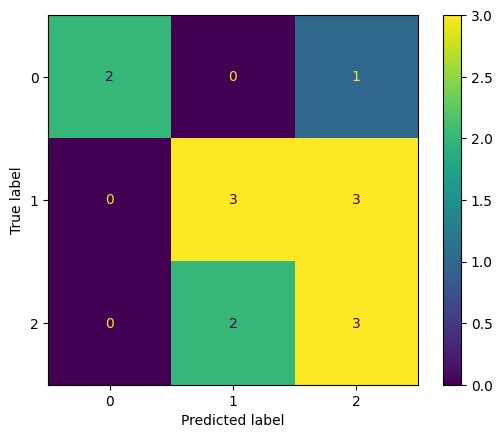

In [27]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred1)

In [28]:
print(metrics.classification_report(y_true,y_pred1,
                                    target_names=['DR1', 'DR2', 'DR3']))

              precision    recall  f1-score   support

         DR1       1.00      0.67      0.80         3
         DR2       0.60      0.50      0.55         6
         DR3       0.43      0.60      0.50         5

    accuracy                           0.57        14
   macro avg       0.68      0.59      0.62        14
weighted avg       0.62      0.57      0.58        14



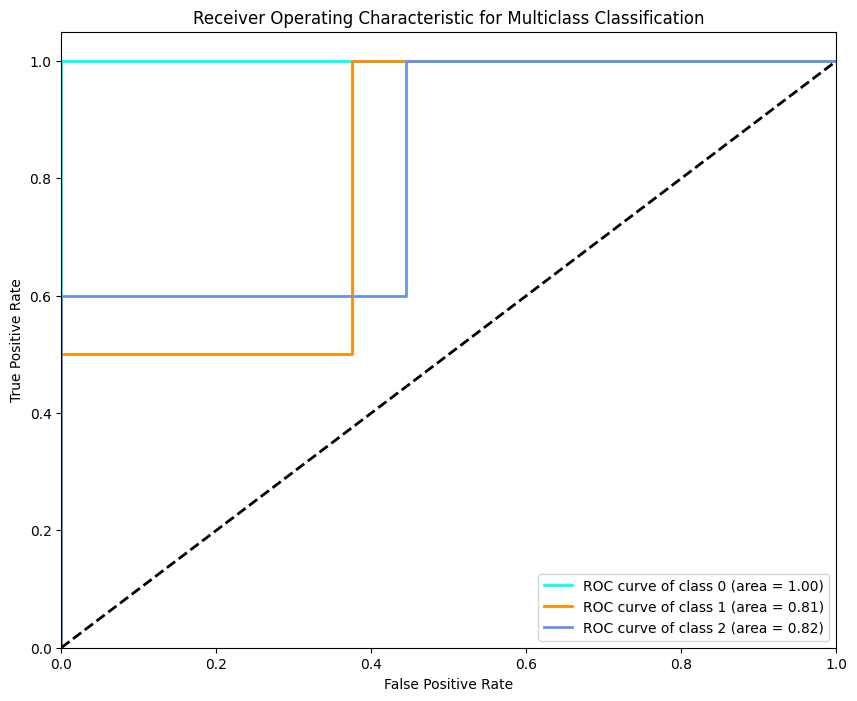

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

# Assuming you have your model predictions and ground truth labels
# model_predictions = Your model's predicted probabilities for each class
# ground_truth_labels = Ground truth labels for each sample

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
ground_truth_labels_binary = label_binarizer.fit_transform(y_true)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_binarizer.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ground_truth_labels_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_binarizer.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/DRVGG16_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(100,100))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["DR1", "DR2", "DR3"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/split/test/DR3/1ffa92ed-8d87-11e8-9daf-6045cb817f5b..JPG"
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)


1/1 [==============================] - 0s 433ms/step
Prediction: DR2
